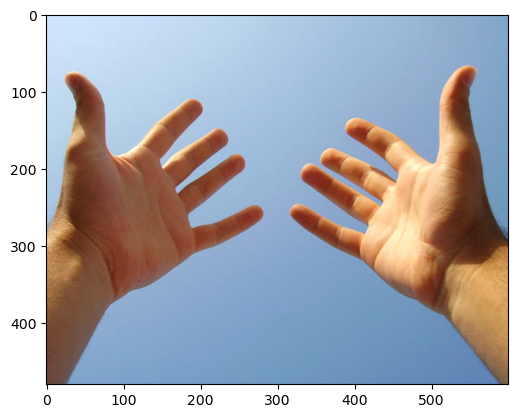

In [1]:
import cv2 as cv
import numpy as np

from matplotlib import pyplot as plt
src = cv.imread("manitos.jpg")
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)

plt.imshow(src)

In [2]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88, 205, 54) # vibrant green

def draw_landmarks_on_image(rgb_image, detection_result):
  hand_landmarks_list = detection_result.hand_landmarks
  handedness_list = detection_result.handedness
  annotated_image = np.copy(rgb_image)

  # Loop through the detected hands to visualize.
  for idx in range(len(hand_landmarks_list)):
    hand_landmarks = hand_landmarks_list[idx]
    handedness = handedness_list[idx]

    # Draw the hand landmarks.
    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    hand_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      hand_landmarks_proto,
      solutions.hands.HAND_CONNECTIONS,
      solutions.drawing_styles.get_default_hand_landmarks_style(),
      solutions.drawing_styles.get_default_hand_connections_style())

    # Get the top left corner of the detected hand's bounding box.
    height, width, _ = annotated_image.shape
    x_coordinates = [landmark.x for landmark in hand_landmarks]
    y_coordinates = [landmark.y for landmark in hand_landmarks]
    text_x = int(min(x_coordinates) * width)
    text_y = int(min(y_coordinates) * height) - MARGIN

    # Draw handedness (left or right hand) on the image.
    cv.putText(annotated_image, f"{handedness[0].category_name}",
                (text_x, text_y), cv.FONT_HERSHEY_DUPLEX,
                FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS, cv.LINE_AA)

  return annotated_image

In [4]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an HandLandmarker object.
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("manitos.jpg")

# STEP 4: Detect hand landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the classification result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
plt.imshow(cv.cvtColor(annotated_image, cv.COLOR_RGB2BGR))

RuntimeError: Unable to open file at c:\Users\david.fernandezrebor\AppData\Local\miniconda3\envs\ia\lib\site-packages/c:\Users\david.fernandezrebor\Desktop\Master\IA\PROGRAMACION_DE_IA\Mediapipe\hand_landmarker.task, errno=22

: 

In [3]:
import cv2
import mediapipe as mp

# Paso 1: Crea un objeto HandLandmarker.
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2)

# Paso 2: Captura el video en vivo.
cap = cv2.VideoCapture(0)  # 0 para la cámara predeterminada

while cap.isOpened():
    # Paso 3: Lee el fotograma de la cámara.
    ret, frame = cap.read()
    if not ret:
        break
    
    # Paso 4: Convierte el fotograma a RGB y detecta landmarks de manos.
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(rgb_frame)
    
    # Paso 5: Dibuja los landmarks en el fotograma.
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            
            for landmark in hand_landmarks.landmark:
                x, y = int(landmark.x * frame.shape[1]), int(landmark.y * frame.shape[0])
                cv2.circle(frame, (x, y), 5, (0, 255, 0), -1)
            connections = mp_hands.HAND_CONNECTIONS
            
    cv2.imshow('Hand Landmarks Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


NameError: name 'connections' is not defined